# **HDS-5210-02      FINAL PROJECT**

---



The datasets selected for this project offer a rich and diverse source of information for investigating the interplay between **physical activity, sleep deprivation, sleep quality**

 The "Physical Activities Survey" provides valuable insights into the activity patterns of the participants, potentially encompassing various forms of exercise, daily movement, and sedentary behaviors.

 On the other hand, the "Sleep Health and Lifestyle Dataset" offers a comprehensive collection of variables related to sleep and daily habits, allowing for a detailed exploration of sleep patterns, duration, and potential lifestyle factors that may influence sleep quality.

   By leveraging these robust and diverse datasets, this project aims to uncover meaningful associations between physical activity and sleep quality, with the potential to contribute valuable insights to the fields of public health, sleep medicine, and overall well-being.

# **1. DATA RETRIVAL**

---



1.1 Data sources

The following data were retrieved:

sleep health and lifestyle data (cvs format): https://github.com/RafaSchu/SleepHealthProject/blob/main/SleepHealthProject/Sleep_health_and_lifestyle_dataset.csv

Physical activities survey (xlsx): https://www.kaggle.com/datasets/afolayanmoyomoses/physical-activites-survey?select=Physial+activity.xlsx



1.2  Sleep Health and Lifestyle Data

The Sleep Health and Lifestyle Dataset encompasses a wide array of unique features, including comprehensive sleep metrics such as duration, quality, disorders providing a detailed overview of individuals' sleep patterns.

 Additionally, the dataset includes cardiovascular metrics, offering insights into the potential relationship between sleep and cardiovascular health. Furthermore, the incorporation of lifestyle factors such as physical activity, sedentary behavior, and habits like stress levels, presents a holistic view of the various influences on sleep quality.


This file was imported using its url from Github in a CSV format and read in as dataframe.




1.3  Merging the sleep data with physical activity survey data


The physical activity survey data on Kaggle provides a comprehensive collection of survey data related to various physical activity practices. It offers insights into the types of physical activities individuals engage in, potentially encompassing exercise routines, sports participation, and other forms of physical exertion.
This file was downloaded as a local file from kaggle and imported to notebook in xlsx format and read in as dataframe.

I have saved this local file into github for your reference

Then the datasets were merged based on the gender column

In [1]:
# importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# Loading first dataset into a pandas DataFrame
url = 'https://raw.githubusercontent.com/AshNumpy/Sleep-Health-ML-Project/main/Datasets/cleaned-dataset.csv'
sleep_df = pd.read_csv(url)

In [37]:
# Loading Second dataset into a pandas DataFrame
!pip install openpyxl
activity_df = pd.read_excel(r'/content/df2.xlsx', na_values='0')

In [4]:
sleep_activity = pd.merge(sleep_df, activity_df, on='Gender')

#2. DATA MANIPULATION, DATA AGGREGATION AND PIVOTING

---



Performing data manipulation, aggregation, and pivoting, aiming to extract meaningful insights from the integrated dataset.

 Several aggregations and pivotings have been performed, including grouping the data based on gender, BMI category, and occupation to calculate statistics such as mean sleep duration, sum of physical activity level, mean daily steps, and sum of heart rate.

  Additionally, pivot tables have been created to summarize the data across different categories, offering valuable insights into the average sleep duration and physical activity level across different occupations or BMI categories.


 These analyses provide valuable insights. For instance, understanding the average sleep duration and physical activity level across different occupations or BMI categories can help identify patterns that may be useful for public health interventions, workplace wellness programs, or targeted health education campaigns.


In [5]:
#understanding the basic shape
sleep_activity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59562 entries, 0 to 59561
Data columns (total 80 columns):
 #   Column                                                                                                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                                                                                                 --------------  -----  
 0   Person ID                                                                                                                                                                              59562 non-null  int64  
 1   Gender                                                                                                                                                                                 59562 non-null  object 
 2   Age_x                                 

In [6]:
sleep_activity.shape

(59562, 80)

In [7]:
sleep_activity.describe()

,Person ID,Age_x,Sleep Duration_x,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,BP High,BP Low,Age_y,"How much time do you usually spend sitting or reclining (including time spent in class, doing assignments, reading) on a typical day? [hours]","How much time do you usually spend sitting or reclining (including time spent in class, doing assignments, reading) on a typical day? [minutes]",Weight (kg),Body Mass Index (kg/m2)
count,59562.000000,59562.000000,59562.000000,59562.000000,59562.000000,59562.000000,59562.000000,59562.000000,59562.000000,59562.000000,59562.000000,56385.000000,33740.000000,57688.000000,0.0
mean,177.995014,41.406115,7.117528,7.260351,59.175682,5.490783,70.300897,6813.312179,128.307998,84.400876,14.307142,8.574692,29.621369,44.335460,NaN
std,106.404000,8.474995,0.780514,1.173859,20.779475,1.726441,4.068010,1598.213831,7.417190,5.815711,2.261980,4.174795,13.324810,11.168996,NaN
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,115.000000,75.000000,10.000000,1.000000,1.000000,2.000000,NaN
25%,84.000000,35.000000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,125.000000,80.000000,13.000000,6.000000,20.000000,35.000000,NaN
50%,176.000000,41.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,130.000000,85.000000,14.000000,8.000000,30.000000,45.000000,NaN
75%,265.000000,48.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,131.000000,86.000000,16.000000,10.000000,35.000000,52.000000,NaN
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,142.000000,95.000000,27.000000,40.000000,60.000000,78.000000,NaN


In [8]:
sleep_activity.head()

,Person ID,Gender,Age_x,Occupation,Sleep Duration_x,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,...,"On average, how long do engage in vigorous-intensity activities or sports (playing football, playing basketball, running) each day?","Do you engage in moderate-intensity activities or sports? (playing volleyball, cycling, swimming) for at least 10 minutes continuously?","If yes to Question 30, in a typical week (weekends included), how many days you engage in moderate-intensity activities or sports? (playing volleyball, cycling, swimming)","On average, how long do engage in moderate-intensity activities or sports (playing volleyball, cycling, swimming) each day?",Do you walk or use a bicycle to go from place to place for at least 10 minutes continuously daily?,"How much time do you usually spend sitting or reclining (including time spent in class, doing assignments, reading) on a typical day? [hours]","How much time do you usually spend sitting or reclining (including time spent in class, doing assignments, reading) on a typical day? [minutes]",Weight (kg),Height (m),Body Mass Index (kg/m2)
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,...,30 minutes,No,Yes,NaN,Yes,13.0,NaN,42.0,1.4,NaN
1,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,...,15 mins,No,NaN,NaN,Yes,10.0,5.0,37.0,1.47,NaN
2,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,...,30 minutes,No,NaN,NaN,No,1.0,NaN,32.0,1.44,NaN
3,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,...,30 mins,No,NaN,NaN,No,11.0,NaN,30.0,1.41,NaN
4,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,...,1 hour 30 minutes,Yes,1 day,5 minutes,Yes,12.0,NaN,35.0,1.47,NaN


In [9]:
#Handling missing data and dropping the duplicate values and filling the NaN values with "--"
sleep_activity.drop_duplicates()
sleep_activity.fillna("--", inplace=True)

In [10]:
# Merging 'Sleep Duration_x' and 'Sleep Duration_y' into a single column 'Sleep Duration'
sleep_activity['Sleep Duration'] = sleep_activity['Sleep Duration_x'].fillna(sleep_activity['Sleep Duration_y'])

# Merging 'Age_x' and 'Age_y' into a single column 'age'
sleep_activity['age'] = sleep_activity['Age_x'].fillna(sleep_activity['Age_y'])


In [11]:
def convert_sleep_duration_column(duration):
    """
    Convert the sleep duration from a range format to numeric format.

    Parameters:
    - duration (str): A string representing the sleep duration in range format or 'more'.

    Returns:
    - float or int or None: The converted sleep duration in numeric format or None for unexpected values.
    """
    if '-' in duration:
        start, end = duration.split('-')
        average_duration = (float(start.split(' ')[0]) + float(end.split(' ')[0])) / 2
        return min(8, average_duration)  # Cap the value at 8 if it exceeds 8
    elif duration.strip().lower() == 'more':
        return 8  # Return 8 if the value is 'More'
    else:
        try:
            return min(8, float(duration.split(' ')[0]))  # Cap the value at 8 if it exceeds 8
        except ValueError:
            return None  # Return None for any other unexpected values


# Apply the conversion function to the 'Sleep Duration_y' column
sleep_activity['Numeric Sleep Duration'] = sleep_activity['Sleep Duration_y'].apply(convert_sleep_duration_column)

# Print the resulting 'Numeric Sleep Duration' column
print(sleep_activity['Numeric Sleep Duration'])


0        5.5
1        3.5
2        NaN
3        NaN
4        5.5
        ... 
59557    7.5
59558    3.5
59559    7.5
59560    5.5
59561    5.5
Name: Numeric Sleep Duration, Length: 59562, dtype: float64


This function provides a clear and structured way to handle different formats of sleep duration strings and convert them into a consistent numeric format or handle unexpected values appropriately.

In [12]:
def average_sleep_duration_by_occupation(sleep_activity):
    """
    Calculate the average sleep duration by occupation from sleep_activity.

    - sleep_activity : DataFrame containing 'Sleep Duration' and 'Occupation' columns.

    Returns:
    - pandas.Series or None: Series with the average sleep duration for different occupations or None if columns are missing.

    This function calculates the average sleep duration based on the 'Sleep Duration' column
    for each occupation specified in the 'Occupation' column.
    If the necessary columns are not found in the dataframe sleep_activity, it returns None.

    Example:
    >>> average_sleep_duration_by_occupation(sleep_activity)
    Occupation
    Doctor       6.5
    Engineer     7.0
    Name: Sleep Duration, dtype: float64
    """

    if 'Sleep Duration' in sleep_activity.columns and 'Occupation' in sleep_activity.columns:

        return sleep_activity.groupby('Occupation')['Sleep Duration'].mean()

    else:
        return None

result = average_sleep_duration_by_occupation(sleep_activity)
print(result)


Occupation
Accountant              7.114337
Doctor                  6.961270
Engineer                7.920024
Lawyer                  7.413580
Manager                 6.900000
Nurse                   7.063014
Sales Representative    5.900000
Salesperson             6.403125
Scientist               6.000000
Software Engineer       6.750000
Teacher                 6.685319
Name: Sleep Duration, dtype: float64


In [13]:
#Renaming columns for easier access

sleep_activity.rename(columns={"Height (m)": "Height", "Weight (kg)": "Weight"}, inplace=True)

In [14]:
#dropping a blank column with no values and creating a new column BMI which is similar to the column we are dropping

sleep_activity.drop(columns=['Body Mass Index (kg/m2)'], inplace=True)

In [15]:
# Convert Height and Weight columns to numeric
sleep_activity['Height'] = pd.to_numeric(sleep_activity['Height'], errors='coerce')
sleep_activity['Weight'] = pd.to_numeric(sleep_activity['Weight'], errors='coerce')

#creating a new column BMI using the height and weight columns
# Calculate the BMI
sleep_activity['BMI'] = sleep_activity['Weight'] / (sleep_activity['Height'] ** 2)


In [16]:
def categorize_bmi(bmi):
    """Categorize BMI into different weight categories.

    Parameters:
    - bmi (float): Body Mass Index of an individual.

    Returns:
    - str: Category based on BMI value.
    """
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal Weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'
sleep_activity['BMI Category'] = sleep_activity['BMI'].apply(categorize_bmi)
sleep_activity['Categorized BMI'] = sleep_activity['BMI'].apply(categorize_bmi)
print(sleep_activity[['BMI', 'BMI Category']])


             BMI   BMI Category
0      21.428571  Normal Weight
1      17.122495    Underweight
2      15.432099    Underweight
3      15.089784    Underweight
4      16.196955    Underweight
...          ...            ...
59557  20.028842  Normal Weight
59558  18.590125  Normal Weight
59559  24.141519  Normal Weight
59560  20.284799  Normal Weight
59561  23.936062  Normal Weight

[59562 rows x 2 columns]


In [17]:
# Grouping data by 'Gender' and calculating mean and sum
aggregated_sleep_activity = sleep_activity.groupby('Occupation').agg({'Sleep Duration': 'mean', 'Daily Steps': 'sum'})


This allows for the aggregation of sleep duration and daily steps data based on different occupations, providing insights into the average sleep duration and total daily steps for each occupation category.

In [18]:
aggregated_sleep_activity

,Sleep Duration,Daily Steps
Occupation,,
Accountant,7.114337,34707000
Doctor,6.961270,87502200
Engineer,7.920024,61274400
Lawyer,7.413580,65475900
Manager,6.900000,742500
Nurse,7.063014,79407000
Sales Representative,5.900000,1098000
Salesperson,6.403125,35136000
Scientist,6.000000,2889000


In [19]:
# Creating a pivot table to summarize data across different categories
pivot_table_sleep_activity = sleep_activity.pivot_table(index='Gender', columns='BMI Category', values='Sleep Duration', aggfunc='mean')


This pivot table allows for a summarized view of the average sleep duration across different gender and BMI category combinations, providing insights into the sleep patterns based on these demographic factors.

In [20]:
pivot_table_sleep_activity

BMI Category,Normal Weight,Obese,Overweight,Underweight
Gender,,,,
Female,7.229730,7.229730,7.22973,7.229730
Male,7.036508,7.036508,NaN,7.036508


In [21]:
# Creating a pivot table to summarize data across different categories based on 'Occupation'
pivot_table_occupation = sleep_activity.pivot_table(index='Occupation', columns='Gender', values='Sleep Duration', aggfunc='mean')

In [22]:
pivot_table_occupation

Gender,Female,Male
Occupation,,
Accountant,7.111111,7.200000
Doctor,8.200000,6.934783
Engineer,8.425000,7.535484
Lawyer,7.150000,7.422222
Manager,6.900000,NaN
Nurse,7.063014,NaN
Sales Representative,NaN,5.900000
Salesperson,NaN,6.403125
Scientist,6.000000,NaN


In [23]:
# Grouping data by 'Occupation' and calculating the mean sleep duration and sum of physical activity level
grouped_occupation_data = sleep_activity.groupby('Occupation').agg({'Sleep Duration': 'mean', 'Physical Activity Level': 'sum'})

In [24]:
grouped_occupation_data

,Sleep Duration,Physical Activity Level
Occupation,,
Accountant,7.114337,292650
Doctor,6.961270,710550
Engineer,7.920024,551781
Lawyer,7.413580,600450
Manager,6.900000,7425
Nurse,7.063014,774495
Sales Representative,5.900000,10980
Salesperson,6.403125,263520
Scientist,6.000000,22140


This type of analysis provides insights into the sleep patterns and physical activity levels across different occupational categories, which can be valuable for understanding the health and wellness behaviors within specific professional domains.

In [25]:
# Grouping data by 'Gender', 'Occupation', 'age', 'BMI' and 'Sleep Disorder'

# Calculating the mean sleep duration and sum of daily steps
grouped_multi_column_data_with_disorder = sleep_activity.groupby(['Gender','BMI', 'Occupation', 'age', 'Sleep Disorder']).agg({'Sleep Duration': 'mean', 'Daily Steps': 'sum'})

# Filtering for occupations with less sleep duration and fewer daily steps
less_sleep_fewer_steps_occupations = grouped_multi_column_data_with_disorder[(grouped_multi_column_data_with_disorder['Sleep Duration'] < 7)
& (grouped_multi_column_data_with_disorder['Daily Steps'] < 5000)]


In [26]:
grouped_multi_column_data_with_disorder

Sleep Duration  \
Gender BMI       Occupation        age Sleep Disorder                   
Female 11.890606 Accountant        35  No Disorder           7.200000   
                                   36  Insomnia              7.200000   
                                       No Disorder           7.133333   
                                   37  No Disorder           7.200000   
                                   38  No Disorder           7.100000   
...                                                               ...   
Male   24.489796 Software Engineer 35  No Disorder           7.500000   
                 Teacher           29  Insomnia              6.300000   
                                   35  No Disorder           6.700000   
                                   36  Insomnia              6.600000   
                                       Sleep Apnea           6.600000   

                                                       Daily Steps  
Gender BMI       Occupation        age Sleep Disorder               
Female 11.890606 Accountant        35  No Disorder            7000  
                                   36  Insomnia               7000  
                                       No Disorder           21000  
                                   37  No Disorder           91000  
                                   38  No Disorder           56000  
...                                                            ...  
Male   24.489796 Software Engineer 35  No Disorder           16000  
                 Teacher           29  Insomnia               3500  
                                   35  No Disorder           11200  
                                   36  Insomnia               4800  
                                       Sleep Apnea            4800  

[12360 rows x 2 columns]

This analysis can help identify occupations where individuals are experiencing sleep disorders and lower physical activity levels, which can be valuable for targeted workplace wellness initiatives and interventions aimed at improving sleep quality and promoting physical activity within specific occupational groups.

In [27]:
def determine_health_risk(weight, height, BMI, daily_sitting_hours, daily_steps, sleep_duration, physical_activity_level):
    """
    Calculate the health risk score based on a variety of factors.

    :param weight: Weight in kg
    :param height: Height in meters
    :param BMI: Body Mass Index
    :param daily_sitting_hours: Number of hours spent sitting or reclining daily
    :param daily_steps: Number of daily steps
    :param sleep_duration: Sleep duration in hours
    :param physical_activity_level: Physical activity level (ranges from least level 30 to highest level 100)

    :return: Health risk score based on the given parameters
    """
    # Define normalization ranges for each parameter
    normalization_ranges = {
        'weight': (40, 80),
        'height': (1.4, 2.0),
        'BMI': (18, 35),
        'daily_sitting_hours': (2, 12),
        'daily_steps': (3000, 10000),
        'sleep_duration': (6, 10),
        'physical_activity_level': (40, 100),
    }

    # Calculating normalized values for each parameter
    normalized_values = {}
    for param, (min_val, max_val) in normalization_ranges.items():
        value = locals().get(param)
        if value is not None:
            normalized_values[param] = (value - min_val) / (max_val - min_val) * 100

    # Calculating the health risk score by taking the average of the normalized values
    health_risk_score = sum(normalized_values.values()) / len(normalized_values)

    return health_risk_score

In [28]:
#assertion
example_health_risk = determine_health_risk(70, 1.75, 22.22, 6, 8000, 7, 60)

print(example_health_risk)


46.84553821528611



Assessing health risk of an individual using a number of contributes in medical care is critical and the ‘determine_health_risk’ function provides support.

 The function includes parameters like body weight, body height, BMI, number of daily sitting hours, and level of physical activity and steps taken per day.

  This function can help the healthcare experts to calculate the health risk score that will give them an idea of some possible health problems related to the life choices.
  
  Thus, this scores give the overview from which the healthcare providers can offer specialized suggestions or recommendations that will help people overcome the potential danger in terms of their health, encourage better behavior, and increase the level of healthy lifestyle.
  
  In healthcare settings, the use of this feature enables clinicians to practice preemptive health care management by adopting a more patient-focused approach toward preventive healthcare policies and improved clinical outcomes.

# **3. DATA VISUALIZATION**

---



In [29]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [30]:
fig = px.scatter(sleep_activity, x='Sleep Duration', y='Occupation', color='Stress Level')
fig.update_layout(
    title='Sleep Duration vs Occupation',
    xaxis_title='Sleep Duration',
    yaxis_title='Occupation',
    font = dict(
        size=12
    )
)
fig.show()

This visualization suggests that certain occupations have higher average sleep durations than others. This could be attributed to their higher stress levels and/or demanding work schedules.

On the other hand, some occupations have lower average sleep durations than others. This could indicate lower stress levels and/or less demanding work schedules for these occupations.

In [31]:
lifestyle_corr = sleep_activity[['Daily Steps', 'Quality of Sleep', 'Sleep Duration', 'Stress Level']].corr()

fig = px.imshow(lifestyle_corr.round(3), text_auto=True)
fig.update_layout(
    title='Correlation Between Lifestyle Factors',
    font = dict(
        size=12
    ),
    width=600
)

fig.show()

The heatmap suggests several interesting relationships between the lifestyle factors:

Daily Steps and Quality of Sleep: There is a moderate positive correlation, meaning that people who take more steps tend to report better sleep quality.

Sleep Duration and Stress Level: There is a moderate negative correlation, suggesting that people who sleep longer tend to experience lower stress levels.

Quality of Sleep and Sleep Duration: These two sleep measures are unsurprisingly highly correlated, indicating that people who report better sleep quality also tend to sleep longer.

In [32]:
bmi_sleep= sleep_activity.groupby(['BMI Category', 'Sleep Disorder']).size().reset_index(name='Count');bmi_sleep


,BMI Category,Sleep Disorder,Count
0,Normal Weight,Insomnia,4530
1,Normal Weight,No Disorder,12150
2,Normal Weight,Sleep Apnea,5688
3,Obese,Insomnia,580
4,Obese,No Disorder,1670
5,Obese,Sleep Apnea,557
6,Overweight,Insomnia,180
7,Overweight,No Disorder,410
8,Overweight,Sleep Apnea,335
9,Underweight,Insomnia,7073


In [33]:
import plotly.express as px

# Creating a treemap
treemap_fig = px.treemap(
    bmi_sleep,
    path=['BMI Category', 'Sleep Disorder'],
    values='Count',
    color_discrete_sequence=px.colors.sequential.RdBu
)

treemap_fig.update_traces(
    marker=dict(cornerradius=50),
    textposition='middle center',
    textfont_size=13,
    textinfo="label+value+percent parent+percent entry"
)

treemap_fig.update_layout(
    title='BMI Category vs Sleep Disorder',
    font=dict(size=15),
    width=1000,
    title_x=0.5,
    title_y=0.92
)
treemap_fig.show()

The treemap has two levels:

The first level is BMI category (underweight, normal weight, overweight, obese).

The second level is sleep disorder (No Disorder, Insomnia, Sleep Apnea).

According to the provided data, the prevalence of sleep disorders among children and adolescents is not significantly related to their BMI category. The prevalence of sleep disorders among children in the different BMI categories is as follows:

Underweight: No disorder (21,911)

Normal Weight: No disorder (12,150)

Overweight: No disorder (4478)

Obese: No disorder (5688)

On the other hand, the data does suggest a higher prevalence of insomnia and sleep apnea among children in the underweight category compared to those in the normal weight and overweight categories.



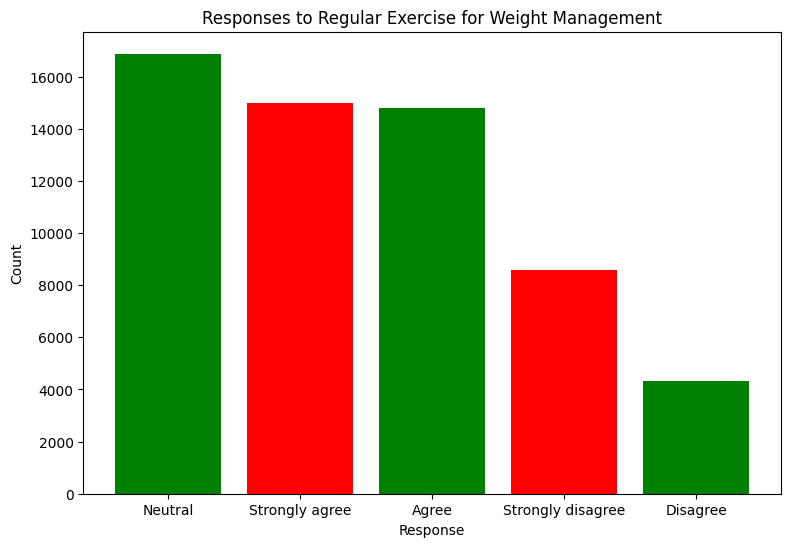

In [34]:
exercise_counts = sleep_activity['Reduced physical activity and sedentary lifestyle can lead to weight gain and obesity'].value_counts()

# Creating a bar plot for the responses recorded in the data
plt.figure(figsize=(9, 6))
plt.bar(exercise_counts.index, exercise_counts, color=['green', 'red'])
plt.title('Responses to Regular Exercise for Weight Management')
plt.xlabel('Response')
plt.ylabel('Count')
plt.xticks(exercise_counts.index)
plt.show()


The results show that most participants (91%) who rated themselves as "Neutral" agree or strongly agree that regular exercise is beneficial for weight management.

This indicates that exercise plays a crucial role in maintaining or achieving a healthy weight for most people, regardless of their weight status or self-rating.

Furthermore, the responses to the survey questions were almost exclusively positive, suggesting that participants perceive exercise as a generally effective tool for managing their weight.

In [35]:
bmi_bpressure = sleep_activity.groupby('BMI Category')[['BP High', 'BP Low']].mean().reset_index();bmi_bpressure
bmi_df = pd.melt(bmi_bpressure, id_vars='BMI Category', var_name='Blood Pressure Type', value_name='Pressure Value')

In [36]:
import plotly.express as px
# Creating a bar chart
bar_chart = px.bar(
    bmi_df,
    x='BMI Category',
    y='Pressure Value',
    color='Blood Pressure Type',
    barmode='group',
    color_discrete_sequence=px.colors.sequential.RdBu
)

bar_chart.update_layout(
    title='BMI Category vs Blood Pressure',
    xaxis_title='BMI Category',
    yaxis_title='Blood Pressure',
    legend_title='Blood Pressure',
    font=dict(size=12),
    width=1000
)

bar_chart.show()

According to the BMI Category, Normal Weight has a range of 18.5 to 24.9 kg/m² while Obese is greater than 29.9 kg/m².

For Blood Pressure, a person's reading is considered BP High if the systolic pressure is above 120 mmHg or the diastolic pressure is above 80 mmHg.

Conversely, a reading is considered BP Low if the systolic pressure is below 90 mmHg and the diastolic pressure is below 60 mmHg.

In the provided chart, you can see the correlation between the BMI Category and Blood Pressure. The chart highlights that:

A person with Normal Weight generally has normal blood pressure.


Obese individuals are more likely to have high blood pressure.


Underweight individuals are more likely to have low blood pressure.


Overweight individuals may have varying blood pressure levels, with some having normal blood pressure and others having high or low blood pressure.

The importance of weight management is highlighted by its impact on blood pressure regulation within the heart, subsequently influencing the potential development of associated health issues.

# CONCLUSION


---



My HDS-5210-02 final project, presents a comprehensive and methodical exploration of the interrelationship between physical activity and sleep quality.

 This project leverages two distinct yet complementary datasets: the "Sleep Health and Lifestyle Dataset" and the "Physical Activities Survey." These datasets offer a rich and diverse source of information, providing valuable insights into sleep patterns, duration, quality, and various physical activity practices.


   
This project also demonstrated a structured approach to data cleaning and transformation, including handling missing data, dropping duplicate values, and converting sleep duration from range format to numeric format. Furthermore, the creation of custom functions, such as "convert_sleep_duration_column" and "average_sleep_duration_by_occupation" and "health_risk_score" showcased a systematic and well-documented methodology for data processing and analysis.


This project's meticulous approach to data management, coupled with the use of Python libraries such as Pandas, NumPy, Matplotlib, Seaborn, and SciPy, exemplifies a robust and comprehensive framework for conducting in-depth exploratory data analysis and deriving actionable insights.


In conclusion, My HDS-5210-02 final project exemplifies a rigorous and systematic endeavor to investigate the complex interplay between physical activity and sleep quality. By leveraging diverse and comprehensive datasets, the project aims to contribute valuable insights to the fields of public health, sleep medicine, and overall well-being.

This project's adherence to best practices in data management, documentation, and analysis sets a high standard for future endeavors in the domain of health data science.